In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn import linear_model
import matplotlib.pyplot as plt

# Preparar la data
## Importamos los datos de la libreria datasets de sklearn sobre las casas en California

california = fetch_california_housing()
print(california)
print()


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [7]:
# Entendimiento de la data
## Verificacion de la informacion contenida en el dataset

print('Informacion en el dataset:')
print(california.keys())
print()

Informacion en el dataset:
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])



In [9]:
# Verificacion de las caracteristicas del dataset

print('Caracteristicas del dataset:')
print(california.DESCR)
print()

Caracteristicas del dataset:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S.

In [13]:
# Verificacion de la cantidad de datos que hay en los dataset

print('Cantidad de datos:')
print(california.data.shape)
print()

Cantidad de datos:
(20640, 8)



In [17]:
# Verificacion de la informacion de las columnas:

print('Nombres de las columnas:')
print(california.feature_names)

Nombres de las columnas:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [19]:
# Preparacion de la data para modelo de regresion lineal simple
## Seleccionamos unicamente la columna 3 del dataset

X = california.data[:, np.newaxis, 3]

# Defino los datos correspondientes a las etiquetas
Y = california.target


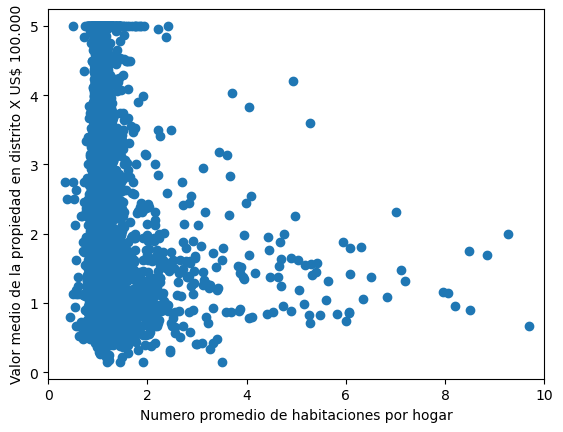

In [29]:
# Graficamos los datos correspondientes

plt.scatter(X, Y)
plt.xlabel('Numero promedio de habitaciones por hogar')
plt.ylabel('Valor medio de la propiedad en distrito X US$ 100.000')
plt.xlim(0, 10)
plt.show()

In [31]:
# Implementacion de modelo de regresion lineal

from sklearn.model_selection import train_test_split

# Separo los datos de train en entrenamiento y prueba para probar los algoritmos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)

In [33]:
# Definicion del algoritmo a utilizar 
lr = linear_model.LinearRegression()

In [37]:
# Entrenamiento del modelo
lr.fit(X_train, Y_train)

LinearRegression()

In [39]:
# realizacion de la prediccion
Y_pred = lr.predict(X_test)

In [55]:
# Comparacion de los datos target de entrenamiento con la prediccion (50 filas)
print(Y_test[:50])

[1.615   3.268   1.357   2.076   5.00001 3.588   1.853   3.5     3.07
 1.036   1.      2.425   2.441   2.952   1.04    1.958   2.008   1.8
 1.794   2.092   1.635   3.825   1.435   0.777   1.538   2.296   2.065
 5.00001 2.871   4.371   1.876   2.671   1.097   2.183   1.661   5.00001
 3.773   2.313   2.118   1.927   2.354   1.587   3.509   3.434   1.843
 1.25    5.00001 0.675   2.464   0.632  ]


In [57]:
print(Y_pred[:50])

[2.06708972 2.07047647 2.08365052 2.07096354 2.0762455  2.07626927
 2.0852853  2.06384299 2.06216944 2.07645179 2.07091015 2.07694825
 2.08637998 2.07120949 2.07457026 2.07865528 2.07526927 2.07903204
 2.06804927 2.0739562  2.07158175 2.08117732 2.07112096 2.04258032
 2.0713896  2.07397178 2.0786881  2.08048058 2.07091724 2.07896366
 2.07287977 2.06502297 2.07372544 2.074578   2.0780013  2.0751156
 2.05484586 2.06561232 2.07478509 2.07400518 2.08192559 2.07330894
 2.07311012 2.07964088 2.08011922 2.05520327 2.07663444 2.07810541
 2.06714982 2.07108215]


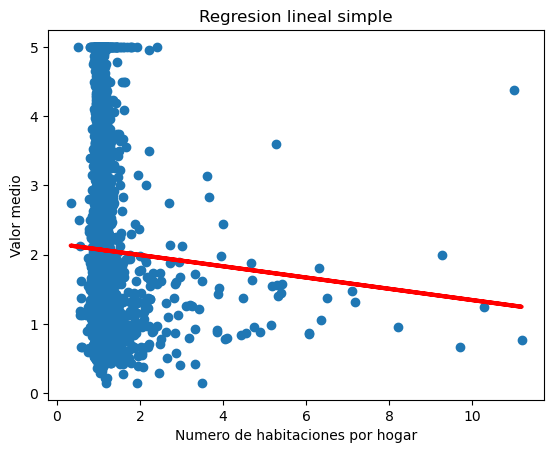

In [65]:
# Grafica de los datos y del modelo de regresion lineal simple

plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color = 'red', linewidth = 3)
plt.title('Regresion lineal simple')
plt.xlabel('Numero de habitaciones por hogar')
plt.ylabel('Valor medio')
plt.show()

In [67]:
print('Datos del modelo de regresion lineal simple:')
print()
print('Valor de la pendiente o coeficiente a:')
print(lr.coef_)

Datos del modelo de regresion lineal simple:

Valor de la pendiente o coeficiente a:
[-0.08136329]


In [69]:
print('Valor de la interseccion o coeficiente b:')
print(lr.intercept_)

Valor de la interseccion o coeficiente b:
2.159011608142038


In [76]:
print('La ecuacion del modelo es igual a:')
print('y = ', lr.coef_,'x + ', lr.intercept_)

La ecuacion del modelo es igual a:
y =  [-0.08136329] x +  2.159011608142038
